In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Data/Significant Earthquake Dataset 1900-2023.csv')

In [3]:
data.head()

Time                            Place  Latitude  \
0  2023-02-17T09:37:34.868Z     130 km SW of Tual, Indonesia   -6.5986   
1  2023-02-16T05:37:05.138Z    7 km SW of Port-Olry, Vanuatu  -15.0912   
2  2023-02-15T18:10:10.060Z      Masbate region, Philippines   12.3238   
3  2023-02-15T06:38:09.034Z  54 km WNW of Otaki, New Zealand  -40.5465   
4  2023-02-14T13:16:51.072Z      2 km NW of Lele?ti, Romania   45.1126   

   Longitude   Depth  Mag MagType    nst   gap   dmin  ...  \
0   132.0763  38.615  6.1     mww  119.0  51.0  2.988  ...   
1   167.0294  36.029  5.6     mww   81.0  26.0  0.392  ...   
2   123.8662  20.088  6.1     mww  148.0  47.0  5.487  ...   
3   174.5709  74.320  5.7     mww   81.0  40.0  0.768  ...   
4    23.1781  10.000  5.6     mww  132.0  28.0  1.197  ...   

                    Updated Unnamed: 14        Type horizontalError  \
0  2023-02-17T17:58:24.040Z         NaN  earthquake            6.41   
1  2023-02-17T05:41:32.448Z         NaN  earthquake            5.99   
2  2023-02-16T20:12:32.595Z         NaN  earthquake            8.61   
3  2023-02-16T06:42:09.738Z         NaN  earthquake            3.68   
4  2023-02-17T09:15:18.586Z         NaN  earthquake            4.85   

   depthError magError  magNst    status  locationSource  magSource  
0       5.595    0.065    23.0  reviewed              us         us  
1       6.080    0.073    18.0  reviewed              us         us  
2       4.399    0.037    71.0  reviewed              us         us  
3       4.922    0.065    23.0  reviewed              us         us  
4       1.794    0.032    95.0  reviewed              us         us  

[5 rows x 23 columns]

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [5]:
df = data.drop(['MagType',
       'nst', 'gap', 'dmin', 'rms', 'net', 'ID', 'Updated', 'Unnamed: 14',
       'Type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       37331 non-null  object 
 1   Place      37047 non-null  object 
 2   Latitude   37331 non-null  float64
 3   Longitude  37331 non-null  float64
 4   Depth      37197 non-null  float64
 5   Mag        37331 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [7]:
df.drop('Place', axis=1)

Time  Latitude  Longitude   Depth   Mag
0      2023-02-17T09:37:34.868Z   -6.5986   132.0763  38.615  6.10
1      2023-02-16T05:37:05.138Z  -15.0912   167.0294  36.029  5.60
2      2023-02-15T18:10:10.060Z   12.3238   123.8662  20.088  6.10
3      2023-02-15T06:38:09.034Z  -40.5465   174.5709  74.320  5.70
4      2023-02-14T13:16:51.072Z   45.1126    23.1781  10.000  5.60
...                         ...       ...        ...     ...   ...
37326  1902-01-01T05:20:30.000Z   52.3800  -167.4500     NaN  7.00
37327  1901-12-31T09:02:30.000Z   51.4500  -171.0200     NaN  7.10
37328  1901-12-30T22:34:00.000Z   52.0000  -160.0000     NaN  7.00
37329  1901-03-03T07:45:00.000Z   36.0000  -120.5000     NaN  6.40
37330  1900-10-09T12:25:00.000Z   57.0900  -153.4800     NaN  7.86

[37331 rows x 5 columns]

In [8]:
df.isna().sum()

Time           0
Place        284
Latitude       0
Longitude      0
Depth        134
Mag            0
dtype: int64

In [9]:
null_columns = df.loc[:, data.isna().sum() > 0.66 * df.shape[0]].columns

In [10]:
df = df.drop(null_columns, axis=1)

In [11]:
df.isna().sum()

Time           0
Place        284
Latitude       0
Longitude      0
Depth        134
Mag            0
dtype: int64

In [12]:
df = df.dropna(axis=0).reset_index(drop=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36913 entries, 0 to 36912
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       36913 non-null  object 
 1   Place      36913 non-null  object 
 2   Latitude   36913 non-null  float64
 3   Longitude  36913 non-null  float64
 4   Depth      36913 non-null  float64
 5   Mag        36913 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [14]:
data.head()

Time                            Place  Latitude  \
0  2023-02-17T09:37:34.868Z     130 km SW of Tual, Indonesia   -6.5986   
1  2023-02-16T05:37:05.138Z    7 km SW of Port-Olry, Vanuatu  -15.0912   
2  2023-02-15T18:10:10.060Z      Masbate region, Philippines   12.3238   
3  2023-02-15T06:38:09.034Z  54 km WNW of Otaki, New Zealand  -40.5465   
4  2023-02-14T13:16:51.072Z      2 km NW of Lele?ti, Romania   45.1126   

   Longitude   Depth  Mag MagType    nst   gap   dmin  ...  \
0   132.0763  38.615  6.1     mww  119.0  51.0  2.988  ...   
1   167.0294  36.029  5.6     mww   81.0  26.0  0.392  ...   
2   123.8662  20.088  6.1     mww  148.0  47.0  5.487  ...   
3   174.5709  74.320  5.7     mww   81.0  40.0  0.768  ...   
4    23.1781  10.000  5.6     mww  132.0  28.0  1.197  ...   

                    Updated Unnamed: 14        Type horizontalError  \
0  2023-02-17T17:58:24.040Z         NaN  earthquake            6.41   
1  2023-02-17T05:41:32.448Z         NaN  earthquake            5.99   
2  2023-02-16T20:12:32.595Z         NaN  earthquake            8.61   
3  2023-02-16T06:42:09.738Z         NaN  earthquake            3.68   
4  2023-02-17T09:15:18.586Z         NaN  earthquake            4.85   

   depthError magError  magNst    status  locationSource  magSource  
0       5.595    0.065    23.0  reviewed              us         us  
1       6.080    0.073    18.0  reviewed              us         us  
2       4.399    0.037    71.0  reviewed              us         us  
3       4.922    0.065    23.0  reviewed              us         us  
4       1.794    0.032    95.0  reviewed              us         us  

[5 rows x 23 columns]

In [15]:
df['Hour'] = data['Time'].apply(lambda x: x[11:13])
df['Date'] = data['Time'].apply(lambda x: x[8:10])
df['Month'] = data['Time'].apply(lambda x: x[5:7])
df['Year'] = data['Time'].apply(lambda x: x[0:4])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36913 entries, 0 to 36912
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       36913 non-null  object 
 1   Place      36913 non-null  object 
 2   Latitude   36913 non-null  float64
 3   Longitude  36913 non-null  float64
 4   Depth      36913 non-null  float64
 5   Mag        36913 non-null  float64
 6   Hour       36913 non-null  object 
 7   Date       36913 non-null  object 
 8   Month      36913 non-null  object 
 9   Year       36913 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.8+ MB


In [17]:
df['Hour'] = df['Hour'].astype("int")
df['Date'] = df['Date'].astype("int")
df['Month'] = df['Month'].astype("int")
df['Year'] = df['Year'].astype("int")
df.head()

Time                            Place  Latitude  \
0  2023-02-17T09:37:34.868Z     130 km SW of Tual, Indonesia   -6.5986   
1  2023-02-16T05:37:05.138Z    7 km SW of Port-Olry, Vanuatu  -15.0912   
2  2023-02-15T18:10:10.060Z      Masbate region, Philippines   12.3238   
3  2023-02-15T06:38:09.034Z  54 km WNW of Otaki, New Zealand  -40.5465   
4  2023-02-14T13:16:51.072Z      2 km NW of Lele?ti, Romania   45.1126   

   Longitude   Depth  Mag  Hour  Date  Month  Year  
0   132.0763  38.615  6.1     9    17      2  2023  
1   167.0294  36.029  5.6     5    16      2  2023  
2   123.8662  20.088  6.1    18    15      2  2023  
3   174.5709  74.320  5.7     6    15      2  2023  
4    23.1781  10.000  5.6    13    14      2  2023

In [18]:
df['Magnitude'] = df['Mag']
df['depth'] = df['Depth']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36913 entries, 0 to 36912
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       36913 non-null  object 
 1   Place      36913 non-null  object 
 2   Latitude   36913 non-null  float64
 3   Longitude  36913 non-null  float64
 4   Depth      36913 non-null  float64
 5   Mag        36913 non-null  float64
 6   Hour       36913 non-null  int32  
 7   Date       36913 non-null  int32  
 8   Month      36913 non-null  int32  
 9   Year       36913 non-null  int32  
 10  Magnitude  36913 non-null  float64
 11  depth      36913 non-null  float64
dtypes: float64(6), int32(4), object(2)
memory usage: 2.8+ MB


In [20]:
df.drop(['Mag', 'Depth'], axis=1, inplace=True)

In [21]:
#df = df.drop(['Time', 'Place'], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36913 entries, 0 to 36912
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       36913 non-null  object 
 1   Place      36913 non-null  object 
 2   Latitude   36913 non-null  float64
 3   Longitude  36913 non-null  float64
 4   Hour       36913 non-null  int32  
 5   Date       36913 non-null  int32  
 6   Month      36913 non-null  int32  
 7   Year       36913 non-null  int32  
 8   Magnitude  36913 non-null  float64
 9   depth      36913 non-null  float64
dtypes: float64(4), int32(4), object(2)
memory usage: 2.3+ MB


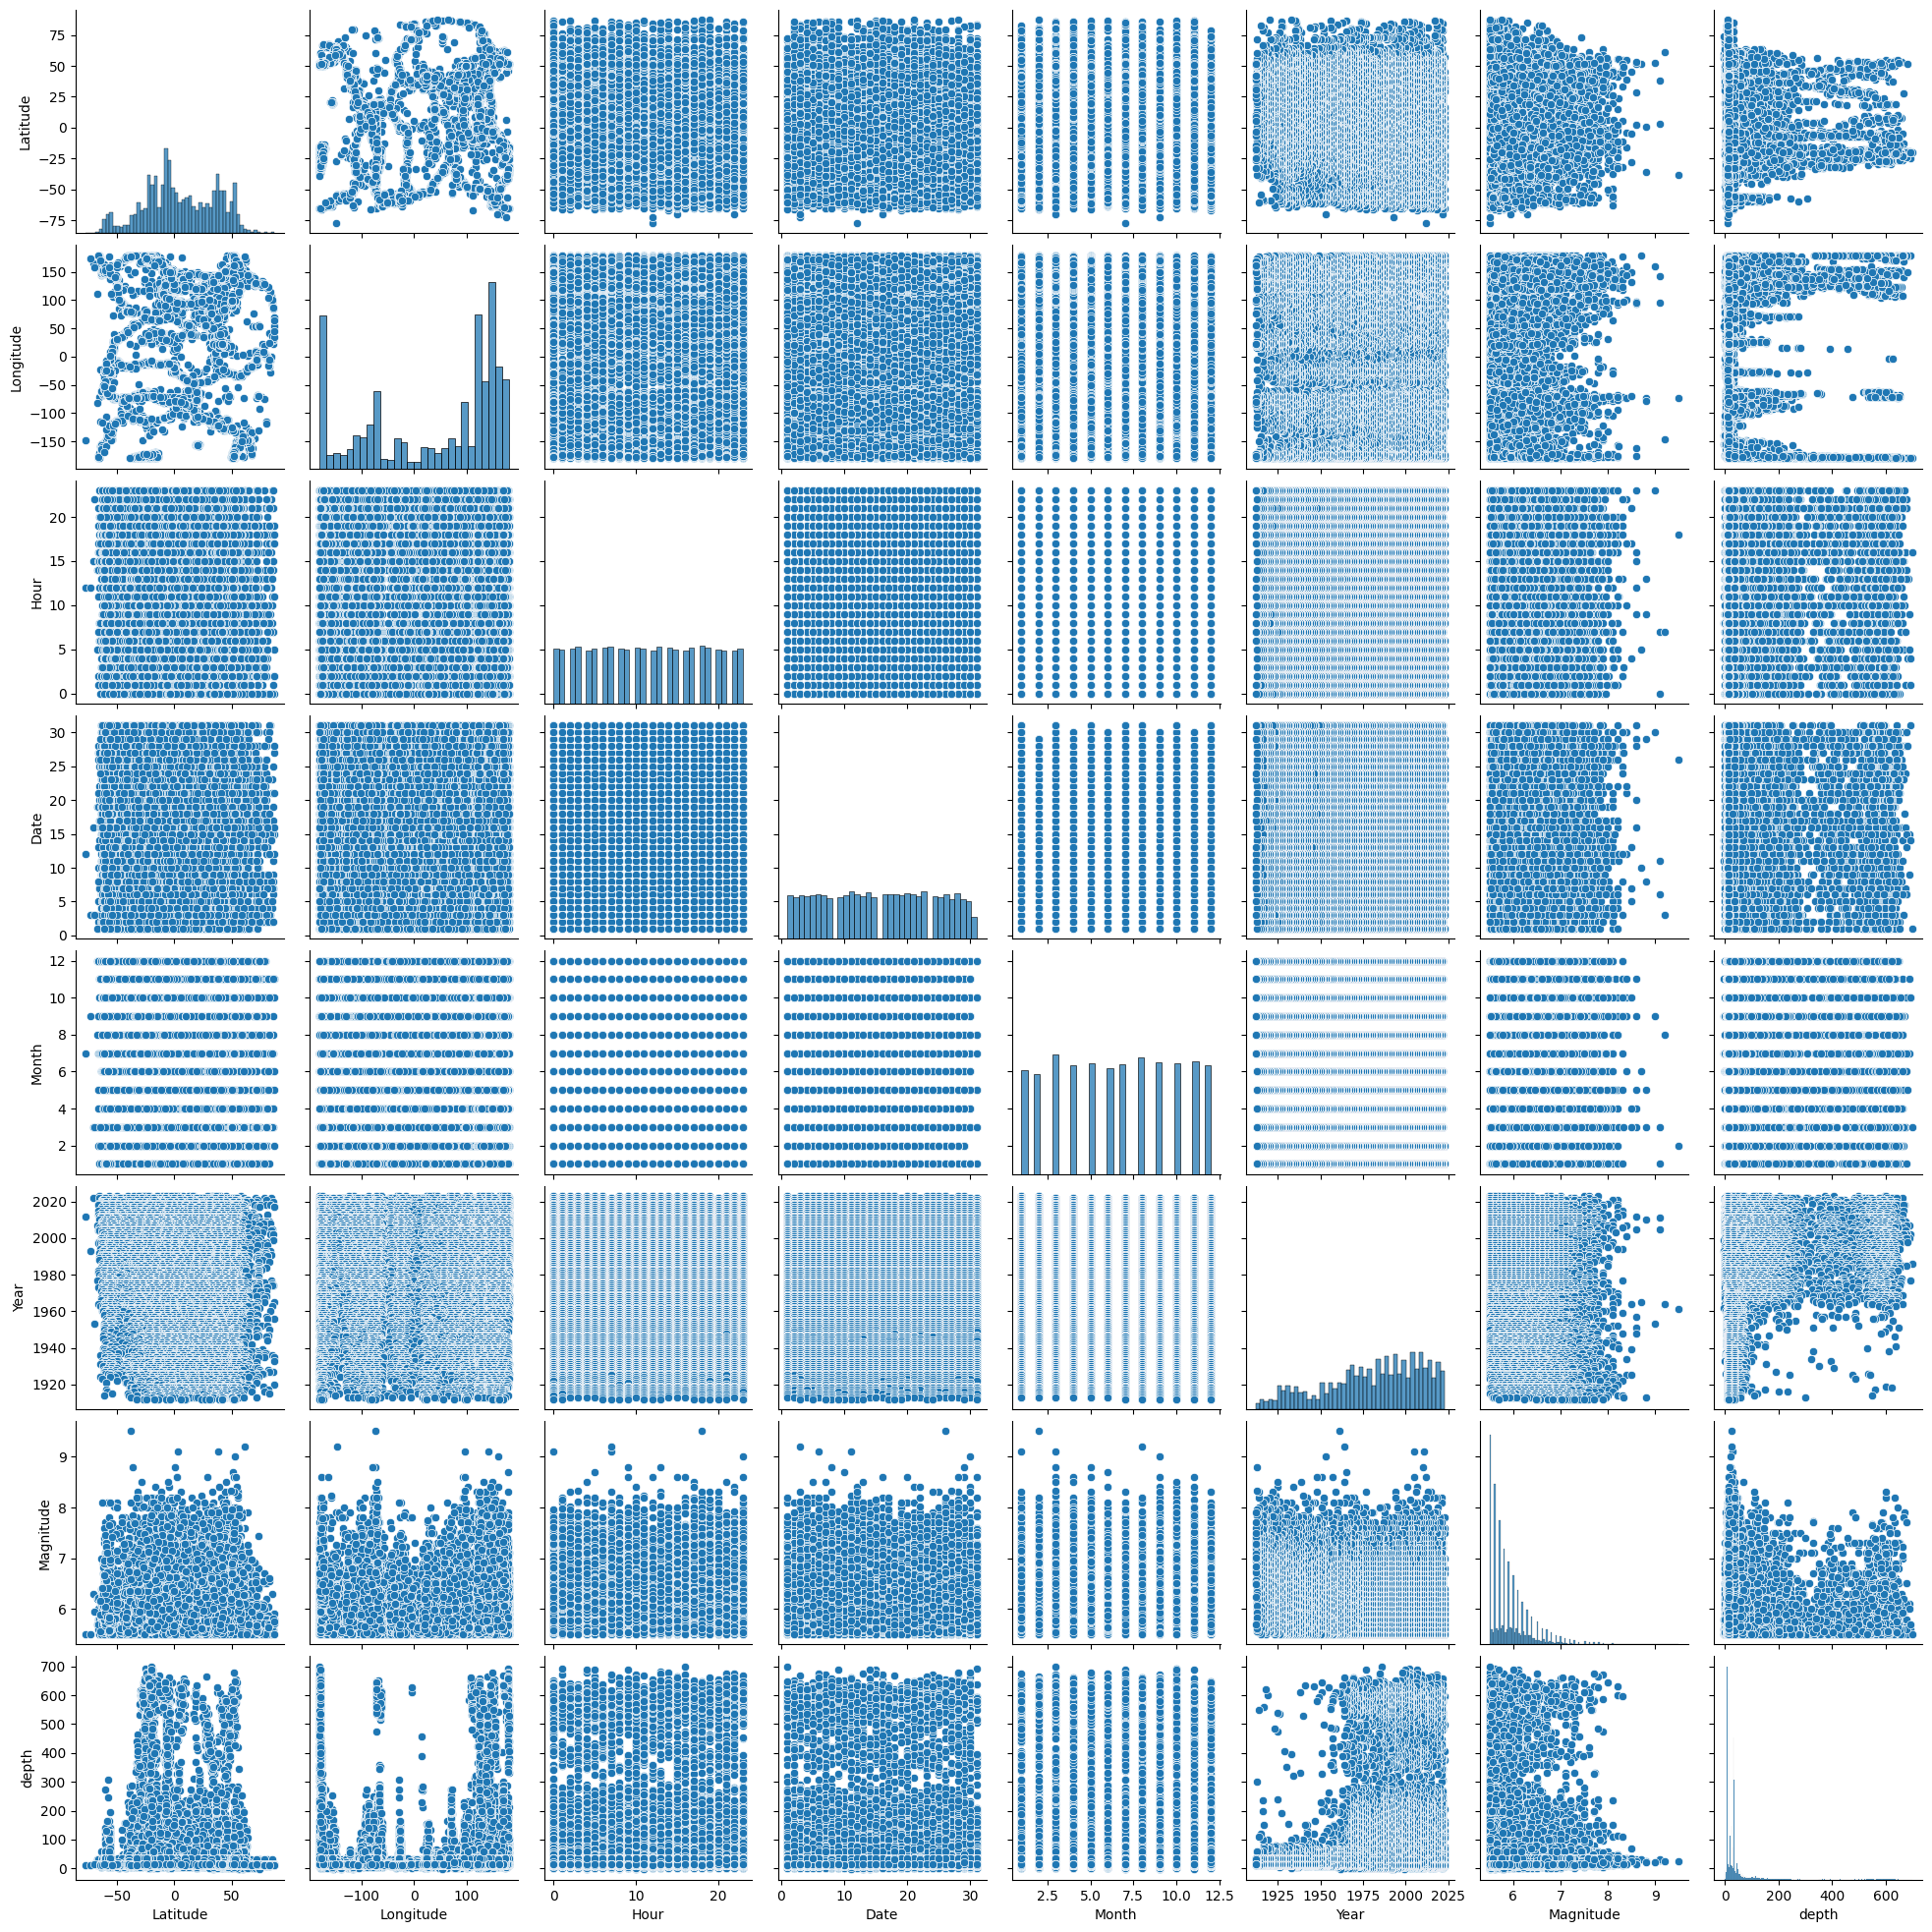

In [23]:
sns.pairplot(df)

<AxesSubplot: xlabel='Time in years', ylabel='Magnitude'>

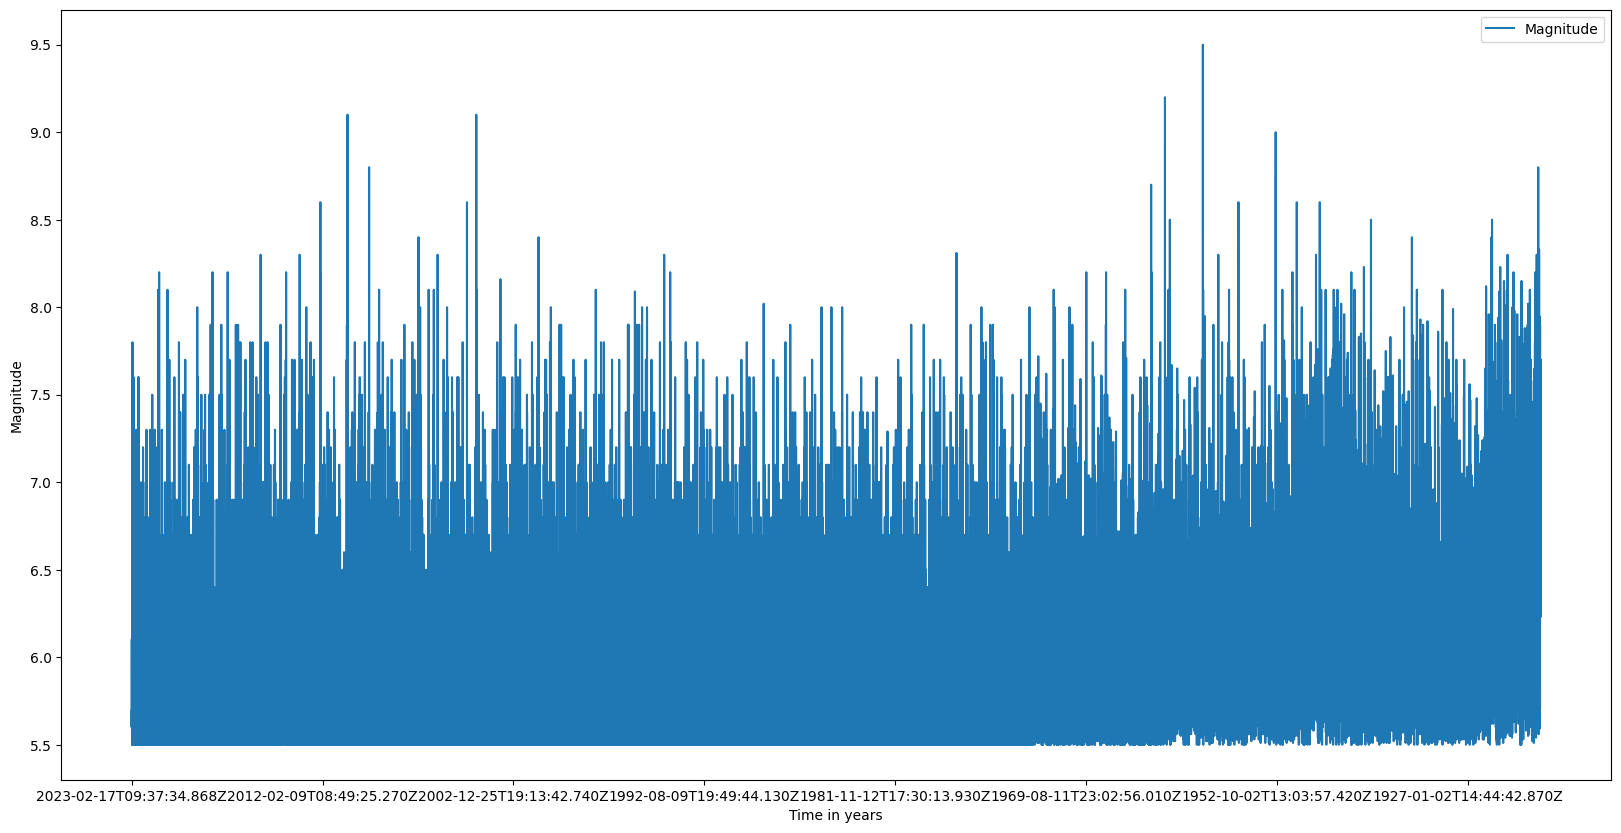

In [24]:
df.plot(x='Time', y='Magnitude', figsize=(20,10), xlabel='Time in years', ylabel='Magnitude')

In [25]:
import plotly.express as px
fig = px.scatter_geo(df, lat='Latitude',
                     lon='Longitude',
                     color='Magnitude',
                     fitbounds='locations',
                     scope='world')
fig.show()

In [26]:
df.drop(df[['Time', 'Place']], axis=1, inplace=True)

In [27]:
X = df.iloc[:,:-2]
y = df.iloc[:,6:8]

In [28]:
X

Latitude  Longitude  Hour  Date  Month  Year
0       -6.5986   132.0763     9    17      2  2023
1      -15.0912   167.0294     5    16      2  2023
2       12.3238   123.8662    18    15      2  2023
3      -40.5465   174.5709     6    15      2  2023
4       45.1126    23.1781    13    14      2  2023
...         ...        ...   ...   ...    ...   ...
36908   30.6840   100.6080    11    24      7  1912
36909   52.7630   160.2770    21    18      7  1912
36910   51.4240   161.6380     8     9      7  1912
36911   41.7580    23.2490     7     7      7  1912
36912   41.8020    23.1080     7     7      7  1912

[36913 rows x 6 columns]

In [29]:
y

Magnitude   depth
0           6.10  38.615
1           5.60  36.029
2           6.10  20.088
3           5.70  74.320
4           5.60  10.000
...          ...     ...
36908       7.09  15.000
36909       7.70  30.000
36910       7.50  15.000
36911       7.02  15.000
36912       6.84  15.000

[36913 rows x 2 columns]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29530, 6) (7383, 6) (29530, 2) (7383, 2)


In [32]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
reg_pred = reg.predict(X_test)

In [34]:
reg_pred

array([[ 5.8057, 46.6154],
       [ 5.833 , 12.0172],
       [ 6.5679, 17.3   ],
       ...,
       [ 6.4337, 22.36  ],
       [ 6.0296, 41.5694],
       [ 5.7656, 86.2465]])

In [35]:
type(reg_pred)

numpy.ndarray

In [36]:
a = reg_pred[:, 0]
b = reg_pred[:, 1]

In [37]:
sub = pd.DataFrame(reg_pred, columns=['Predicted Magnitude', 'Predicted Depth'])
sub['Predicted Magnitude'] = a
sub['Predicted Depth'] = b
sub.head()

Predicted Magnitude  Predicted Depth
0               5.8057         46.61540
1               5.8330         12.01720
2               6.5679         17.30000
3               6.0150         69.85026
4               5.8160         31.89000

In [38]:
sub.head(20)

Predicted Magnitude  Predicted Depth
0                5.8057         46.61540
1                5.8330         12.01720
2                6.5679         17.30000
3                6.0150         69.85026
4                5.8160         31.89000
5                5.7480         12.76160
6                6.3300         38.12620
7                6.1252         47.58400
8                5.8540         58.45380
9                6.2164         22.80000
10               5.8553         41.06700
11               5.7160         10.23920
12               5.8850         28.21200
13               5.9954         14.75000
14               5.9936         50.66800
15               5.7787         24.78800
16               6.4608         27.98400
17               5.7822         34.08520
18               6.3009         21.26100
19               5.7456         56.42380

In [39]:
Latitude = 2.25
Longitude = 5.89
Hour = 14
Date = 20
Month = 8
Year = 2021
magni = reg.predict([[Latitude, Longitude, Hour, Date, Month, Year]])
print(magni)

[[ 5.718  12.0101]]


C:\Users\Aman\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [40]:
#Latitude = 26.89
#Longitude = 75.84
#Hour = 3
#Date = 19
#Month = 7
#Year = 2023
#magni1 = reg.predict([[Latitude, Longitude, Hour, Date, Month, Year]])
#print(magni1)

In [41]:
#Latitude = 40.7128
#Longitude = 74.0060
#Hour = 4
#Date = 19
#Month = 7
#Year = 2023
#magni2 = reg.predict([[Latitude, Longitude, Hour, Date, Month, Year]])
#print(magni2)

In [42]:
#Latitude = 40.7128
#Longitude = -74.0060
#Hour = 4
#Date = 19
#Month = 7
#Year = 2025
#magni3 = reg.predict([[Latitude, Longitude, Hour, Date, Month, Year]])
#print(magni3)

In [43]:
#print(reg.score(X_test, y_test))

In [44]:
print(reg.score(X_train, y_train))

0.9246899760077585


In [46]:
import pickle
pickle_out = open("reg.pkl", "wb")
pickle.dump(reg, pickle_out)
pickle_out.close()

In [47]:
# loading the saved model
loaded_model = pickle.load(open('reg.pkl', 'rb'))

In [54]:
Latitude = 2.25
Longitude = 5.89
Hour = 14
Date = 20
Month = 8
Year = 2021
magni = loaded_model.predict([[Latitude, Longitude, Hour, Date, Month, Year]])
print(magni)

[[ 5.718  12.0101]]


In [ ]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}
#
#grid_obj = GridSearchCV(reg, parameters)
#grid_fit = grid_obj.fit(X_train, y_train)
#best_fit = grid_fit.best_estimator_
#best_fit.predict(X_test)

In [ ]:
#print(best_fit.score(X_test, y_test)) # kya chahata hai bhai.. run hoja pls

In [ ]:
#print(best_fit.score(X_train, y_train))

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#
#def create_model(neurons, activation, optimizer, loss):
#    model = Sequential()
#    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
#    model.add(Dense(neurons, activation=activation))
#    model.add(Dense(2, activation='softmax'))
#    
#    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
#    
#    return model

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.wrappers import scikit_learn as kerasClassifier

#model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
#neurons = [16]
# batch_size = [10, 20, 50, 100]
#batch_size = [10]
#epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
#activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#optimizer = ['SGD', 'Adadelta']
#loss = ['squared_hinge']

#param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)